In [44]:
"""
Create dataset from directory
"""
import os

root = '.'

# dataset_dir = os.path.join(root, 'generated', 'create_sample_extractor_final')
dataset_dir = os.path.join(root, 'generated', 'create_sample_extractor3_1')
workspace = os.path.join(dataset_dir, 'testing')

In [45]:
"""
Read from csv
"""
import pandas as pd

labels = pd.read_csv(os.path.join(workspace, 'labels.csv')) 

In [46]:
"""
Convert to np
"""
import numpy as np
s1_0 = np.array(labels['s1_0'])
s1_1 = np.array(labels['s1_1'])
s1_2 = np.array(labels['s1_2'])
s2_0 = np.array(labels['s2_0'])
s2_1 = np.array(labels['s2_1'])
s2_2 = np.array(labels['s2_2'])
s2_3 = np.array(labels['s2_3'])
s2_4 = np.array(labels['s2_4'])
s3_0 = np.array(labels['s3_0'])
s3_1 = np.array(labels['s3_1'])
s3_2 = np.array(labels['s3_2'])
s3_3 = np.array(labels['s3_3'])

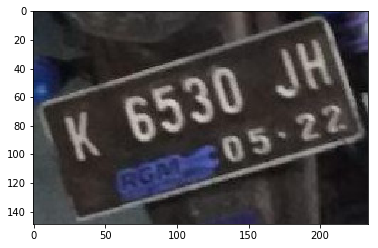

In [48]:
"""
Read image and encode data
"""

import cv2 as cv2
from matplotlib import pyplot as plt

def encode_label_alhpabet(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if not pd.isnull(val):
            encoded_arr[i] = int(ord(val))-64
        else:
            encoded_arr[i] = 0
    return encoded_arr

def encode_label_number(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if not pd.isnull(val):
            encoded_arr[i] = val+1
        else:
            encoded_arr[i] = 0
    return encoded_arr



dataset = []
new_labels = np.zeros((len(labels), 13)).astype(np.int32)
for i in range(len(labels)):
    dataset.append(cv2.imread(os.path.join(workspace, labels['image_id'][i])))  # Image
    new_labels[:, 1] = s1_0
    new_labels[:, 2] = encode_label_alhpabet(s1_1)
    new_labels[:, 3] = encode_label_alhpabet(s1_2)
    
    new_labels[:, 4] = s2_0
    new_labels[:, 5] = encode_label_number(s2_1)
    new_labels[:, 6] = encode_label_number(s2_2)
    new_labels[:, 7] = encode_label_number(s2_3)
    new_labels[:, 8] = encode_label_number(s2_4)
    
    new_labels[:, 9] = s3_0
    new_labels[:, 10] = encode_label_alhpabet(s3_1)
    new_labels[:, 11] = encode_label_alhpabet(s3_2)
    new_labels[:, 12] = encode_label_alhpabet(s3_3)

plt.imshow(dataset[5])
plt.show()
str(new_labels[5])

In [49]:
"""
Image resizing
"""
import cv2 as cv2
model_input_dim = (200, 61)
def image_resizer(im, dim):
    image = cv2.resize(im, dim, interpolation=cv2.INTER_LINEAR)
    return image

# Resize semua dataset untuk inferencing
im_dim = (200, 61)
dataset_resized = []
for i in range(len(dataset)):
    dataset_resized.append(image_resizer(dataset[i], im_dim))
dataset_resized = np.array(dataset_resized)
dataset_resized.shape

(50, 61, 200, 3)

In [50]:
"""
Logitize model using one hot 
"""
from keras.utils import *

def logitize_labels(labels):
    labels = np.array(labels)
    # Convert S2 labels to logits
    logits_s1_0 = np_utils.to_categorical(labels[:, 1], 3)
    logits_s1_1 = np_utils.to_categorical(labels[:, 2], 27)
    logits_s1_2 = np_utils.to_categorical(labels[:, 3], 27)
    s1_logits = np.hstack([logits_s1_0, logits_s1_1, logits_s1_2])
    
    # Convert S2 labels to logits
    logits_s2_0 = np_utils.to_categorical(labels[:, 4], 5) 
    logits_s2_1 = np_utils.to_categorical(labels[:, 5], 11) 
    logits_s2_2 = np_utils.to_categorical(labels[:, 6], 11) 
    logits_s2_3 = np_utils.to_categorical(labels[:, 7], 11) 
    logits_s2_4 = np_utils.to_categorical(labels[:, 8], 11)
    s2_logits = np.hstack([logits_s2_0, logits_s2_1, logits_s2_2, logits_s2_3, logits_s2_4])
    
    # Convert S3 labels to logits
    logits_s3_0 = np_utils.to_categorical(labels[:, 9], 4)
    logits_s3_1 = np_utils.to_categorical(labels[:, 10], 27)
    logits_s3_2 = np_utils.to_categorical(labels[:, 11], 27)
    logits_s3_3 = np_utils.to_categorical(labels[:, 12], 27)
    s3_logtis = np.hstack([logits_s3_0, logits_s3_1, logits_s3_2, logits_s3_3])
    
    return np.hstack([s1_logits, s2_logits, s3_logtis])

logitized_labels = logitize_labels(new_labels)
logitized_labels.shape

(50, 191)

s1 :  2
[0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
s2 :  1
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
s3 :  4
[0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


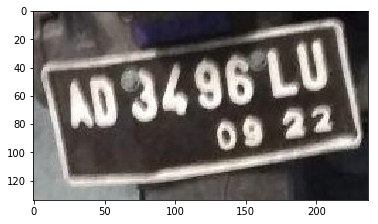

In [51]:

"""
Sanity Checking
"""
from matplotlib import pyplot as plt

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = [s1_0, s1_1, s1_2]
    s2 = [s2_0, s2_1, s2_2, s2_3, s2_4]
    s3 = [s3_0, s3_1, s3_2, s3_3]
    return [s1_0, s1_1, s1_2, s2_0, s2_1, s2_2, s2_3, s2_4, s3_0, s3_1, s3_2, s3_3]


def label_decoder(label):
    """
    Label Decoder
    Output real value from the label
    e.g 'AE 2343 PY'
    """
    alphabet_dict = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    number_dict = " 0123456789"
    s1 = ''
    s1 += alphabet_dict[label[1]]
    s1 += alphabet_dict[label[2]]
    
    s2 = ''
    s2 += number_dict[label[4]]
    s2 += number_dict[label[5]]
    s2 += number_dict[label[6]]
    s2 += number_dict[label[7]]
    
    s3 = ''
    s3 += alphabet_dict[label[9]] 
    s3 += alphabet_dict[label[10]] 
    s3 += alphabet_dict[label[11]]
    
    return s1 + ' ' + s2 + ' ' + s3  


select = 8
plt.imshow(dataset[select])
# Check S1
print('s1 : ', str(logits_decoder(logitized_labels[select])[0]))
print(str(logitized_labels[select, label_helper['m_s1']]))
print(str(logitized_labels[select, label_helper['s1_1']]))
print(str(logitized_labels[select, label_helper['s1_2']]))

# Check S2
print('s2 : ', str(logits_decoder(logitized_labels[select])[1]))
print(str(logitized_labels[select, label_helper['m_s2']]))
print(str(logitized_labels[select, label_helper['s2_1']]))
print(str(logitized_labels[select, label_helper['s2_2']]))
print(str(logitized_labels[select, label_helper['s2_3']]))
print(str(logitized_labels[select, label_helper['s2_4']]))

# Check S3
print('s3 : ', str(logits_decoder(logitized_labels[select])[2]))
print(str(logitized_labels[select, label_helper['m_s3']]))
print(str(logitized_labels[select, label_helper['s3_1']]))
print(str(logitized_labels[select, label_helper['s3_2']]))
print(str(logitized_labels[select, label_helper['s3_3']]))



In [20]:

"""
Open Model
"""
# load json and create model
from keras.engine.saving import model_from_json

json_file = open(os.path.join(dataset_dir, 'modelz2.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.join(dataset_dir, "extractorz2_Retrain_epoch-05_loss-1.6646_val_loss-0.1571.h5"))
print("Loaded model from disk")
# plot_model(loaded_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'loaded_modelz5.jpg'))


Loaded model from disk


In [21]:
"""
Plate Loss function
"""

from keras import backend as K
from keras.optimizers import SGD

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s1']], y_pred[:, label_helper['m_s1']]))
    loss_s1_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_1']], y_pred[:, label_helper['s1_1']]))
    loss_s1_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_2']], y_pred[:, label_helper['s1_2']]))
    
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s2']], y_pred[:, label_helper['m_s2']]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_1']], y_pred[:, label_helper['s2_1']]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_2']], y_pred[:, label_helper['s2_2']]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_3']], y_pred[:, label_helper['s2_3']]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_4']], y_pred[:, label_helper['s2_4']]))
    
    loss_s3_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s3']], y_pred[:, label_helper['m_s3']]))
    loss_s3_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_1']], y_pred[:, label_helper['s3_1']]))
    loss_s3_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_2']], y_pred[:, label_helper['s3_2']]))
    loss_s3_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_3']], y_pred[:, label_helper['s3_3']]))
    
    loss_s1 = loss_s1_0 + loss_s1_1 + loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

def character_acc2(y_true, y_pred):
    s1_0 = K.equal(K.argmax(y_true[:, label_helper['m_s1']]), K.argmax(y_pred[:, label_helper['m_s1']]))
    s1_1 = K.equal(K.argmax(y_true[:, label_helper['s1_1']]), K.argmax(y_pred[:, label_helper['s1_1']]))
    s1_2 = K.equal(K.argmax(y_true[:, label_helper['s1_2']]), K.argmax(y_pred[:, label_helper['s1_2']]))
    
    s2_0 = K.equal(K.argmax(y_true[:, label_helper['m_s2']]), K.argmax(y_pred[:, label_helper['m_s2']]))
    s2_1 = K.equal(K.argmax(y_true[:, label_helper['s2_1']]), K.argmax(y_pred[:, label_helper['s2_1']]))
    s2_2 = K.equal(K.argmax(y_true[:, label_helper['s2_2']]), K.argmax(y_pred[:, label_helper['s2_2']]))
    s2_3 = K.equal(K.argmax(y_true[:, label_helper['s2_3']]), K.argmax(y_pred[:, label_helper['s2_3']]))
    s2_4 = K.equal(K.argmax(y_true[:, label_helper['s2_4']]), K.argmax(y_pred[:, label_helper['s2_4']]))
    
    s3_0 = K.equal(K.argmax(y_true[:, label_helper['m_s3']]), K.argmax(y_pred[:, label_helper['m_s3']]))
    s3_1 = K.equal(K.argmax(y_true[:, label_helper['s3_1']]), K.argmax(y_pred[:, label_helper['s3_1']]))
    s3_2 = K.equal(K.argmax(y_true[:, label_helper['s3_2']]), K.argmax(y_pred[:, label_helper['s3_2']]))
    s3_3 = K.equal(K.argmax(y_true[:, label_helper['s3_3']]), K.argmax(y_pred[:, label_helper['s3_3']]))
    
    s1 = K.mean(s1_0) + K.mean(s1_1) + K.mean(s1_2)
    s2 = K.mean(s2_0) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4)
    s3 = K.mean(s3_0) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)
    # return (K.mean(s1_1) + K.mean(s1_2) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)) / 9
    return (s1+s2+s3)/12
"""
Compile Model
"""
loaded_model.compile(optimizer=SGD(lr=0.001, momentum=0.8), loss=plate_loss, metrics=[character_acc2])


In [52]:
"""
Running model inference modo
"""

x = dataset_resized
y = logitized_labels
loaded_model.evaluate(x, y, batch_size=5)


 5/50 [==>...........................] - ETA: 25s

10/50 [=====>........................] - ETA: 11s

15/50 [========>.....................] - ETA: 6s 

20/50 [===========>..................] - ETA: 4s

25/50 [==============>...............] - ETA: 3s

30/50 [=================>............] - ETA: 2s

35/50 [====================>.........] - ETA: 1s

40/50 [=======================>......] - ETA: 0s

45/50 [==========================>...] - ETA: 0s

50/50 [==============================] - 4s 72ms/step


[32.7628662109375, 0.4600000187754631]

[2, 9, 13, 4, 7, 2, 8, 6, 3, 17, 13, 9]
IM 6175 QMI


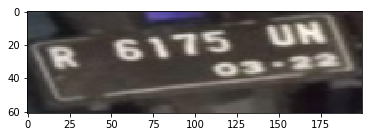

In [102]:
"""
Predict single image
"""
i = 48
x_single = x[i]
x_gray = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY) 
x_gray = cv2.cvtColor(x_gray, cv2.COLOR_GRAY2BGR) 
y = loaded_model.predict(np.expand_dims(x_single, 0))
print(logits_decoder(y[0]))
print(label_decoder(logits_decoder(y[0])))
plt.imshow(x_single)
plt.show()